In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('/kaggle/input/temperature-data-albany-new-york/daily_data.csv')

In [8]:
print(data.head())

       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...                   190.0            

In [9]:
print(data.shape)

(2668, 32)


In [10]:
print(data.describe())

            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   
std                          19.116250          

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   STATION                                     2668 non-null   int64  
 1   DATE                                        2668 non-null   object 
 2   REPORT_TYPE                                 2668 non-null   object 
 3   SOURCE                                      2668 non-null   int64  
 4   BackupElements                              2668 non-null   object 
 5   BackupElevation                             2668 non-null   int64  
 6   BackupEquipment                             2668 non-null   object 
 7   BackupLatitude                              2668 non-null   float64
 8   BackupLongitude                             2668 non-null   float64
 9   BackupName                                  2668 non-null   object 
 10  DailyAverage

In [12]:
data.isna().sum()

STATION                                       0
DATE                                          0
REPORT_TYPE                                   0
SOURCE                                        0
BackupElements                                0
BackupElevation                               0
BackupEquipment                               0
BackupLatitude                                0
BackupLongitude                               0
BackupName                                    0
DailyAverageDewPointTemperature               0
DailyAverageDryBulbTemperature                0
DailyAverageRelativeHumidity                  0
DailyAverageSeaLevelPressure                  0
DailyAverageStationPressure                   0
DailyAverageWetBulbTemperature                0
DailyAverageWindSpeed                         0
DailyCoolingDegreeDays                        0
DailyDepartureFromNormalAverageTemperature    0
DailyHeatingDegreeDays                        0
DailyMaximumDryBulbTemperature          

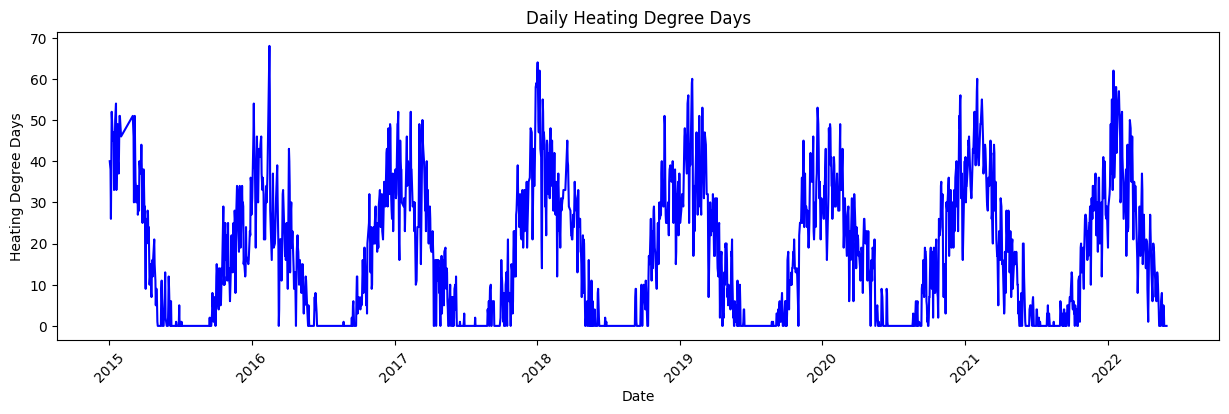

In [68]:
data['DATE'] = pd.to_datetime(data['DATE'])

# Plotting chart1: DailyAverageDryBulbTemperature
plt.figure(figsize=(15, 4))
plt.plot(data['DATE'], data['DailyHeatingDegreeDays'], color='blue')
plt.title('Daily Heating Degree Days')
plt.xlabel('Date')
plt.ylabel('Heating Degree Days')
plt.xticks(rotation=45)

plt.show()

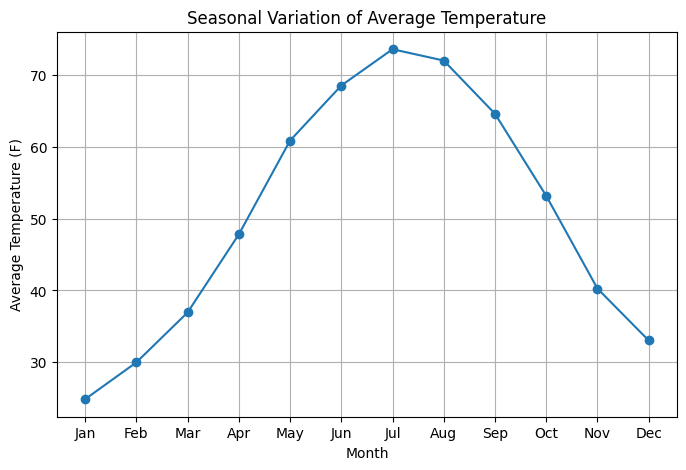

In [56]:
# Extract month and year from the date
data['Month'] = data['DATE'].dt.month
data['Year'] = data['DATE'].dt.year

# Group by month and calculate the average temperature for each month
monthly_avg_temp = data.groupby(['Month'])['DailyAverageDryBulbTemperature'].mean()

# Plot the seasonal variation of temperature
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o', linestyle='-')
plt.title('Seasonal Variation of Average Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (F)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

In [15]:
data = data[data['DailyPrecipitation'] != 'T']

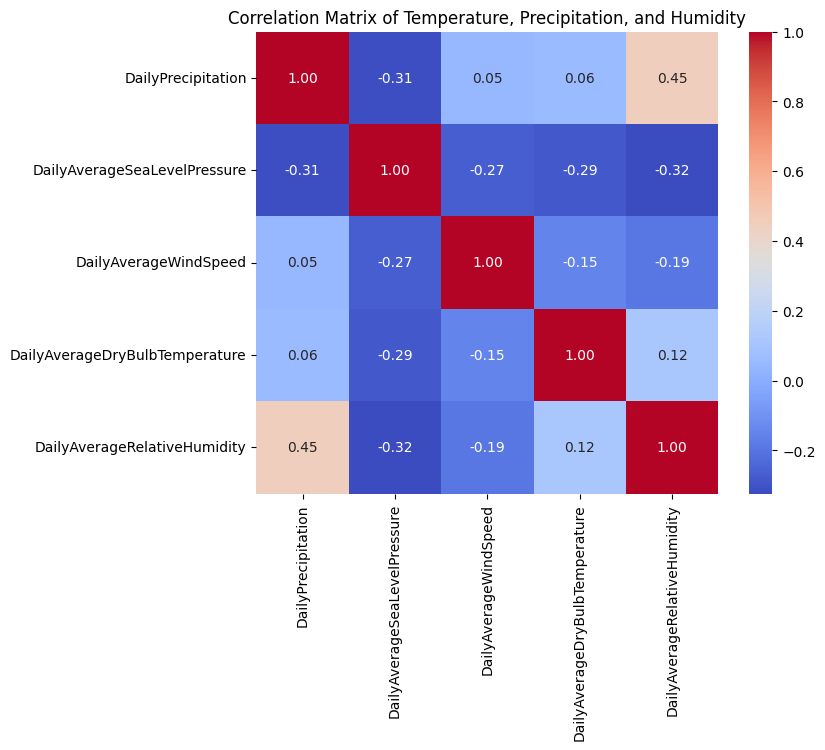

In [16]:
correlation_matrix = data[[ 'DailyPrecipitation','DailyAverageSeaLevelPressure','DailyAverageWindSpeed','DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Temperature, Precipitation, and Humidity')
plt.show()

In [39]:
df = pd.read_csv('/kaggle/input/temperature-data-albany-new-york/hourly_data.csv', low_memory=False)


In [42]:
df = df[df['HourlyPrecipitation'] != 'T']

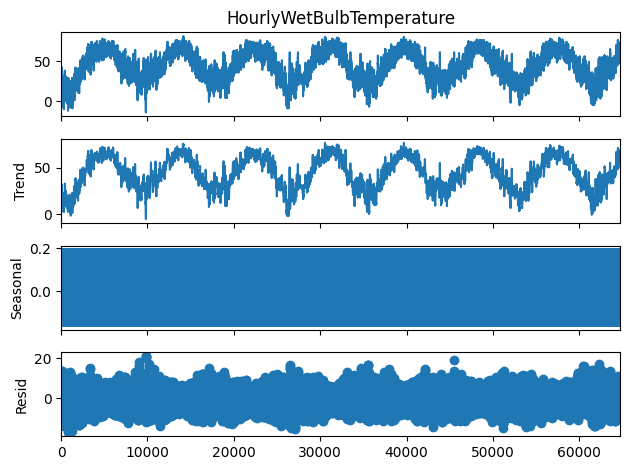

In [55]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame with a 'HourlyPrecipitation' column
# Replace any non-numeric values in the 'HourlyPrecipitation' column with NaN
df['HourlyWetBulbTemperature'] = pd.to_numeric(df['HourlyWetBulbTemperature'], errors='coerce')

# Drop rows with NaN values in 'HourlyPrecipitation' column
df.dropna(subset=['HourlyWetBulbTemperature'], inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['HourlyWetBulbTemperature'], model='additive', period=30)  # Assuming a seasonal period of 30
decomposition.plot()
plt.show()


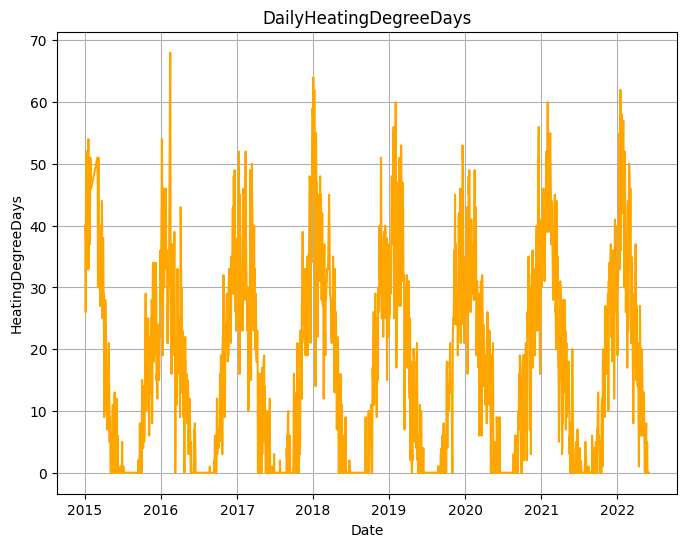

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(data['DATE'], data['DailyHeatingDegreeDays'], color='orange')
plt.title('DailyHeatingDegreeDays')
plt.xlabel('Date')
plt.ylabel('HeatingDegreeDays')
plt.grid(True)
plt.show()



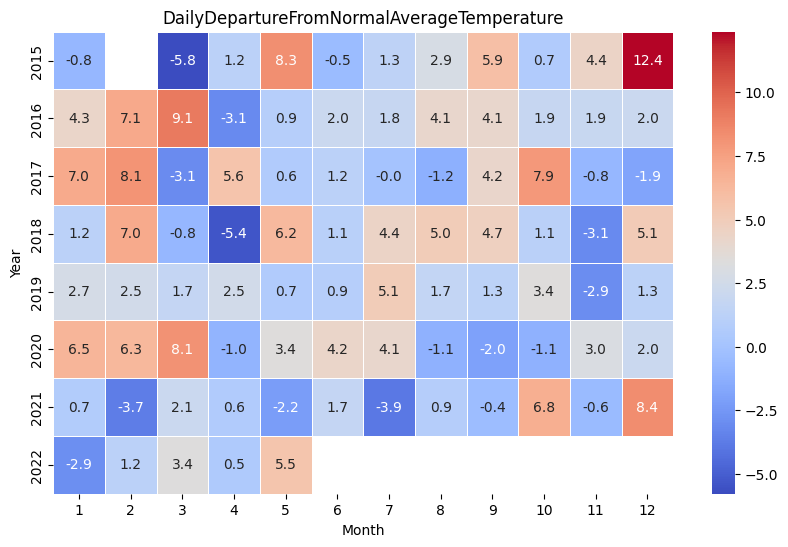

In [62]:
data['Year'] = pd.to_datetime(data['DATE']).dt.year
data['Month'] = pd.to_datetime(data['DATE']).dt.month

# Aggregate duplicate entries by taking the mean temperature for each year and month
heatmap_data = data.groupby(['Year', 'Month'])['DailyDepartureFromNormalAverageTemperature'].mean().unstack()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.title('DailyDepartureFromNormalAverageTemperature')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()




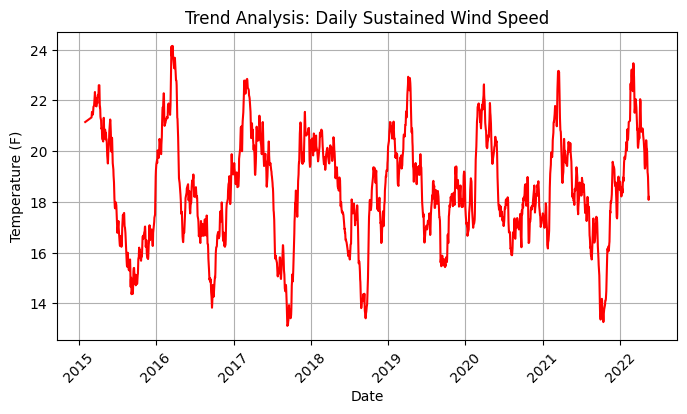

In [66]:
temperature_column = 'DailySustainedWindSpeed'
decomposition = seasonal_decompose(data[temperature_column], period=30)
trend = decomposition.trend

# Plot trend analysis
plt.figure(figsize=(8, 4))
plt.plot(data['DATE'], trend, color='red')
plt.title('Trend Analysis: Daily Sustained Wind Speed')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()